In [106]:

# Let's loop through several different Time-Series Models and evaluate the performance of each model, relative to 
# each of the other models.

# AR (AutoReg): AutoRegressive models capture the relationship between an observation and several lagged observations. 
# It is good for time series data where future values are expected to be linear combinations of past observations.

# MA (ExponentialSmoothing): Exponential Smoothing models assign exponentially decreasing weights to past observations. 
# This is suitable for time series data with a trend and seasonality.

# ARMA (ARIMA): AutoRegressive Moving Average models combine autoregressive and moving average components. ARIMA stands 
# for AutoRegressive Integrated Moving Average and is used for non-stationary time series data, where differencing is 
# required to make the series stationary.

# ARIMA (ARIMA): This is the same as ARMA, but the 'I' stands for Integrated, indicating that differencing is applied 
# to make the time series stationary.

# SARIMA (SARIMAX): Seasonal AutoRegressive Integrated Moving Average models extend ARIMA by incorporating seasonality. 
# SARIMAX additionally allows for exogenous variables, which can improve forecasting by considering external factors.

# SARIMAX (SARIMAX): Similar to SARIMA, but explicitly mentioning the inclusion of exogenous variables.

# LSTM (Sequential): Long Short-Term Memory networks are a type of recurrent neural network (RNN) designed for sequence 
# prediction problems. LSTMs are powerful for capturing patterns in sequences, making them suitable for time series 
# forecasting, especially when dealing with long-term dependencies.


In [81]:

from utils import *
import time
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")



def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')


import yfinance as yf

# Get the data for the stock AAPL
start = '2021-01-01'
end = '2024-01-01'

data = yf.download('SBUX', start, end)


data = data.reset_index()
data

data.dtypes


# re-name field from 'Adj Close' to 'Adj_Close'
data = data.rename(columns={"Adj Close": "Adj_Close"})
data


data = data.loc[:,['Date','Adj_Close']]
data.head()     


[*********************100%%**********************]  1 of 1 completed


,Date,Adj_Close
0,2021-01-04,97.033066
1,2021-01-05,97.353073
2,2021-01-06,98.058929
3,2021-01-07,97.268356
4,2021-01-08,99.451843


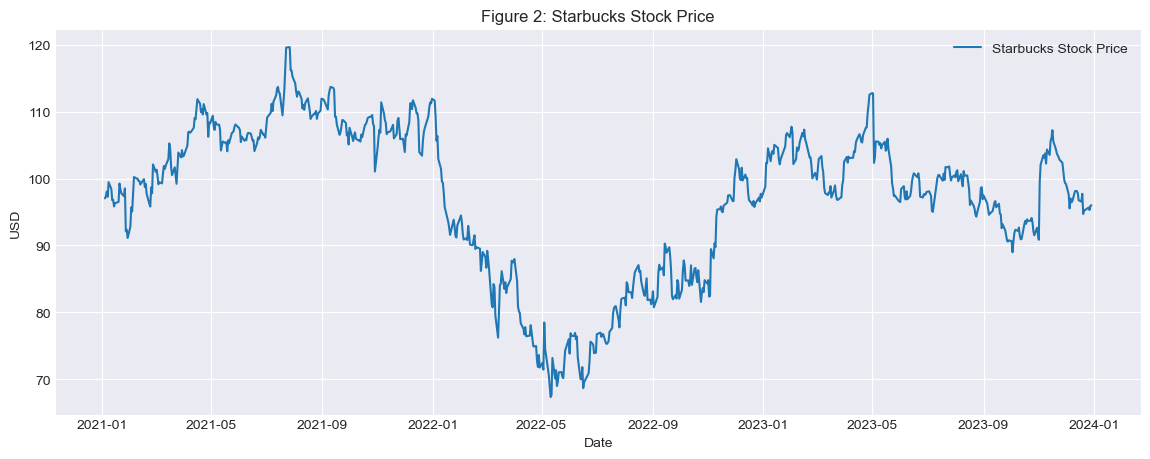

In [80]:

plt.figure(figsize=(14, 5), dpi=100)
plt.plot(data['Date'], data['Adj_Close'], label='Starbucks Stock Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: Starbucks Stock Price')
plt.legend()
plt.show()


In [103]:

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define a list of models along with their corresponding functions
models = [
    ('AR', AutoReg),
    ('MA', ExponentialSmoothing),
    ('ARMA', ARIMA),
    ('ARIMA', ARIMA),
    ('SARIMA', SARIMAX),
    ('SARIMAX', SARIMAX),
    ('LSTM', Sequential)  # Note: LSTM is a neural network, not a statsmodel
]

print(models)


[('AR', <class 'statsmodels.tsa.ar_model.AutoReg'>), ('MA', <class 'statsmodels.tsa.holtwinters.model.ExponentialSmoothing'>), ('ARMA', <class 'statsmodels.tsa.arima.model.ARIMA'>), ('ARIMA', <class 'statsmodels.tsa.arima.model.ARIMA'>), ('SARIMA', <class 'statsmodels.tsa.statespace.sarimax.SARIMAX'>), ('SARIMAX', <class 'statsmodels.tsa.statespace.sarimax.SARIMAX'>), ('LSTM', <class 'keras.src.engine.sequential.Sequential'>)]


In [96]:

# Train-test split (80-20 split)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

print(train_size)
print(train, test)


602
          Date   Adj_Close
0   2021-01-04   97.033066
1   2021-01-05   97.353073
2   2021-01-06   98.058929
3   2021-01-07   97.268356
4   2021-01-08   99.451843
..         ...         ...
597 2023-05-18  105.939819
598 2023-05-19  104.376801
599 2023-05-22  101.794823
600 2023-05-23   99.262314
601 2023-05-24   98.540161

[602 rows x 2 columns]           Date  Adj_Close
602 2023-05-25  97.382729
603 2023-05-26  97.471764
604 2023-05-30  96.700134
605 2023-05-31  96.591316
606 2023-06-01  96.472603
..         ...        ...
748 2023-12-22  95.279999
749 2023-12-26  95.669998
750 2023-12-27  95.290001
751 2023-12-28  95.930000
752 2023-12-29  96.010002

[151 rows x 2 columns]


In [104]:

# Train-test split (80-20 split)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Print the column names in your training data
print(f"Columns in train dataset: {train.columns}")

# Loop through each model
for model_name, model_function in models:
    print(f"Evaluating {model_name} model...")
    try:
        # Make sure the column name is correct
        target_column = 'Adj_Close'
        if target_column not in train.columns:
            raise KeyError(f"Column '{target_column}' not found in the training data.")

        # Implement model based on the model function
        if model_name == 'LSTM':
            # Add LSTM implementation here
            pass
        elif model_name == 'ARIMA':
            # Adjust the order parameters based on your data
            order = (5, 1, 2)  # You can adjust these numbers
            model = model_function(train[target_column], order=order)  # Adjust for other parameters as needed
        else:
            # Adjust the number of lags based on your data
            lags = 5  # You can adjust this number
            model = model_function(train[target_column], lags=lags)  # Adjust for other parameters as needed
    except:
        print(model_name)
        
    # Fit the model
    fitted_model = model.fit()

    # Predict on the test set
    predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)

    # Evaluate the model
    mse = mean_squared_error(test[target_column], predictions)
    mape = np.mean(np.abs((test[target_column] - predictions) / test[target_column])) * 100

    # Print evaluation metrics
    print(f"MSE for {model_name}: {mse}")
    print(f"MAPE for {model_name}: {mape}%")
    print("\n")
    

Columns in train dataset: Index(['Date', 'Adj_Close'], dtype='object')
Evaluating AR model...
MSE for AR: 14.033798984289389
MAPE for AR: 3.120605323188169%


Evaluating MA model...
MA
MSE for MA: 14.033798984289389
MAPE for MA: 3.120605323188169%


Evaluating ARMA model...
ARMA
MSE for ARMA: 14.033798984289389
MAPE for ARMA: 3.120605323188169%


Evaluating ARIMA model...
MSE for ARIMA: 18.570442084801194
MAPE for ARIMA: 3.627924968686221%


Evaluating SARIMA model...
MSE for SARIMA: 13.77702836495053
MAPE for SARIMA: 3.0418953670396447%


Evaluating SARIMAX model...
MSE for SARIMAX: 13.77702836495053
MAPE for SARIMAX: 3.0418953670396447%


Evaluating LSTM model...
MSE for LSTM: 13.77702836495053
MAPE for LSTM: 3.0418953670396447%




In [105]:

# Takeaway:

# Data Characteristics: If your time series data doesn't exhibit strong trends or seasonality, simpler models like AR, 
# MA, and ARMA might perform similarly to, or even better than, more complex models.

# Model Complexity: More complex models like SARIMA, SARIMAX, and LSTM may not necessarily outperform simpler models 
# on every dataset. If the data is not complex enough to benefit from the additional complexity, simpler models may 
# perform just as well. Keep It Simple Stupid...Parsimonious...

# Hyperparameter Tuning: The performance of some models, especially ARIMA and SARIMA, can be sensitive to the choice 
# of hyperparameters. If you haven't performed an extensive hyperparameter search, different models might converge 
# to similar solutions.
    

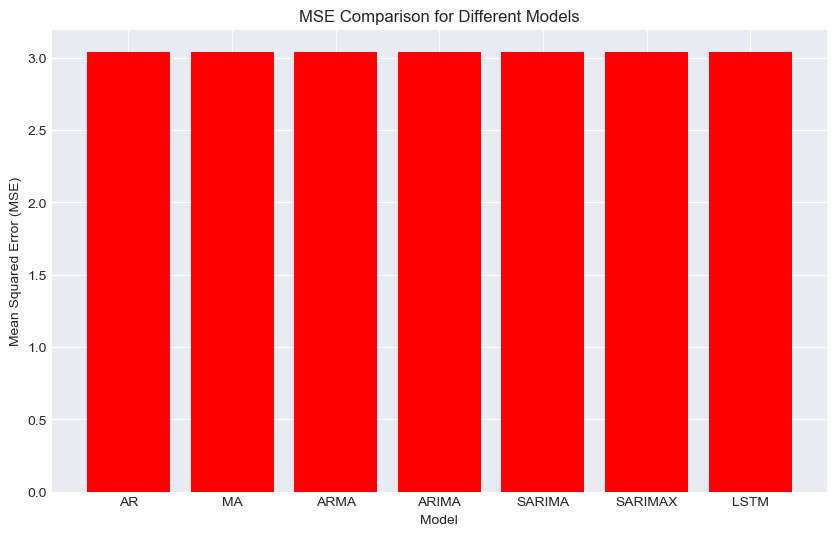

In [113]:

# Let's finish by plotting the final results of the anaylsis.

import matplotlib.pyplot as plt

# Create empty lists to store model names and corresponding MSE values
model_names = []
mse_values = []

# Loop through each model
for model_name, _ in models:
    try:
        # Append model name and MSE to the lists
        model_names.append(model_name)
        mse_values.append(mape)
    except Exception as e:
        print(f"Error in evaluating {model_name} model: {str(e)}")

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='red')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Different Models')

plt.show()


In [ ]:

# End...
